In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
diabetes=load_diabetes()

df_x=diabetes.data
df_y=diabetes.target

df_x = np.array(df_x)
df_y = np.array(df_y)

# 손코딩

## Processing & EDA

### Processing

In [3]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [4]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

W = np.random.rand(10)
b = np.random.rand()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

W,b

(353, 10) (353,)
(89, 10) (89,)


(array([0.95730839, 0.26831718, 0.92681434, 0.80405683, 0.55205405,
        0.87766312, 0.67445928, 0.8733999 , 0.82099114, 0.36009392]),
 0.30413190545281277)

## Modeling

In [6]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i] * W[i]
    predictions += b
    return predictions


def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse



def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## Train

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

W = np.random.rand(10)
b = np.random.rand()

W,b

(array([0.41183018, 0.24418267, 0.61257477, 0.16445266, 0.32671152,
        0.52494528, 0.84407633, 0.80426613, 0.95041394, 0.67228604]),
 0.34744705147093713)

In [13]:
lr = 0.3


losses = []

for i in range(1,1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5833.1124
Iteration 20 : Loss 5625.5190
Iteration 30 : Loss 5436.5037
Iteration 40 : Loss 5264.2419
Iteration 50 : Loss 5107.0942
Iteration 60 : Loss 4963.5869
Iteration 70 : Loss 4832.3952
Iteration 80 : Loss 4712.3281
Iteration 90 : Loss 4602.3145
Iteration 100 : Loss 4501.3910
Iteration 110 : Loss 4408.6911
Iteration 120 : Loss 4323.4351
Iteration 130 : Loss 4244.9215
Iteration 140 : Loss 4172.5187
Iteration 150 : Loss 4105.6580
Iteration 160 : Loss 4043.8276
Iteration 170 : Loss 3986.5661
Iteration 180 : Loss 3933.4580
Iteration 190 : Loss 3884.1287
Iteration 200 : Loss 3838.2405
Iteration 210 : Loss 3795.4886
Iteration 220 : Loss 3755.5984
Iteration 230 : Loss 3718.3216
Iteration 240 : Loss 3683.4343
Iteration 250 : Loss 3650.7340
Iteration 260 : Loss 3620.0378
Iteration 270 : Loss 3591.1802
Iteration 280 : Loss 3564.0114
Iteration 290 : Loss 3538.3960
Iteration 300 : Loss 3514.2112
Iteration 310 : Loss 3491.3455
Iteration 320 : Loss 3469.6980
Iteration 330 : L

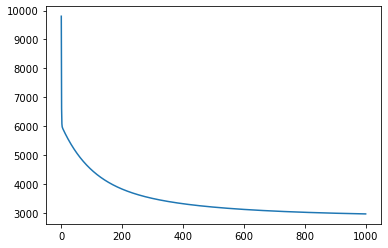

In [14]:
plt.plot(losses)
plt.show()

## Test

In [15]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2870.2245444573055

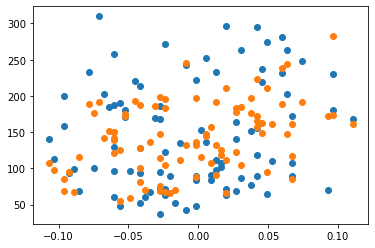

In [16]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# SKL

In [17]:
from sklearn.linear_model import LinearRegression

## Dataset

In [18]:
diabetes=load_diabetes()

df_x=diabetes.data
df_y=diabetes.target

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

## Modeling

In [19]:
model = LinearRegression()

## Train

In [20]:
model.fit(X_train, y_train)

LinearRegression()

## Test

In [21]:
predictions = model.predict(X_test)
predictions

mse = mean_squared_error(y_test, predictions)
mse

2900.193628493482

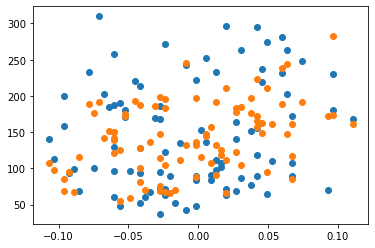

In [22]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()